In [1]:
%load_ext autoreload
%autoreload 2

In [109]:
from hubmap.visualization import visualize_checkpoint
from hubmap.visualization import visualize_random_image, ImageType
from hubmap.visualization import visualize_image
from hubmap.models import DPT
from hubmap.models.dpt import Backbone

from hubmap.dataset import BaseDataset
from hubmap.data import DATA_DIR
import hubmap.dataset.transforms as T

In [112]:
ckpt = "fct_overfit_mock_img_size_64.pt"

(<Figure size 400x400 with 1 Axes>, <Figure size 400x400 with 1 Axes>)

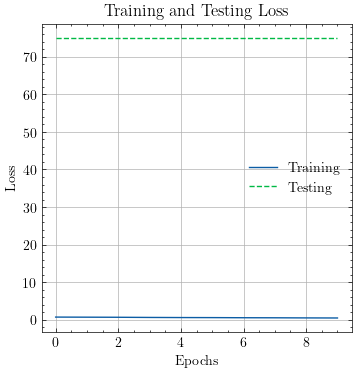

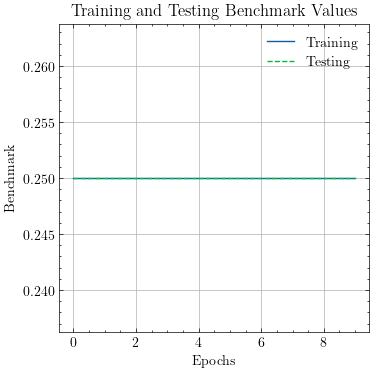

In [113]:
visualize_checkpoint(ckpt)

In [102]:
transforms = T.Compose(
    [
        T.ToTensor(),
        T.Resize((256, 256)),
    ]
)
model_transforms = T.Compose([
    T.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

dataset = BaseDataset(DATA_DIR, transform=transforms, with_background=True)
image, target = dataset.get(0, transform=transforms)
target = target[:2, :, :]

In [114]:
import torch

image = torch.load("/home/jflxb/Documents/lmu/HuBMAP/image.pt").squeeze()
target = torch.load("/home/jflxb/Documents/lmu/HuBMAP/target.pt").squeeze()
image.size(), target.size()

(torch.Size([3, 64, 64]), torch.Size([64, 64]))

torch.Size([1, 2, 64, 64])
tensor([0.3839, 0.3849, 0.4223,  ..., 0.9995, 0.9995, 0.9995])


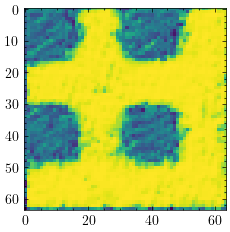

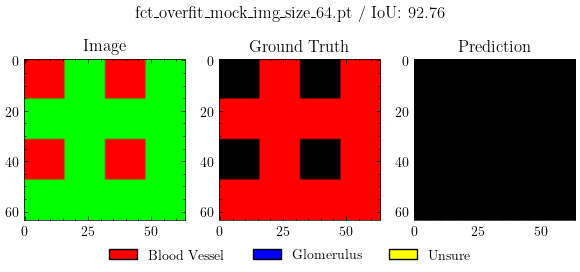

In [96]:
from hubmap.models import FCT
from hubmap.models import init_weights

model = FCT(in_channels=3, num_classes=2)
model.apply(init_weights)

_ = visualize_image(model, ckpt, image, target, transforms=model_transforms, pred_idx=2)

In [22]:
_ = visualize_image(model, ckpt, image, target, transforms=model_transforms, pred_idx=2, overlay=True)

AssertionError: Not implemented yet.

In [152]:
import torch.nn.functional as F

model = FCT(in_channels=3, num_classes=2)
ckpt = torch.load("/home/jflxb/Documents/lmu/HuBMAP/checkpoints/fct_overfit_mock_img_size_64.pt")
model.load_state_dict(ckpt["model_state_dict"])

model.eval()
with torch.no_grad():
    prediction = model(image.unsqueeze(0))
    prediction = prediction[2]
    probs = F.softmax(prediction, dim=1)
    print(probs.size())
    probs, _ = torch.max(probs, dim=1)
    classes = torch.argmax(prediction, dim=1)
    # classes_per_channel = torch.zeros_like(prediction)
    # classes_per_channel.scatter_(1, classes, 1)


torch.Size([1, 2, 64, 64])


In [153]:
probs.size()

torch.Size([1, 64, 64])

torch.Size([1, 64, 64])


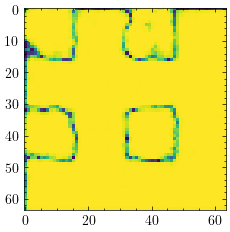

In [154]:
import matplotlib.pyplot as plt

print(probs.size())
plt.imshow(probs.squeeze())

torch.Size([1, 64, 64])


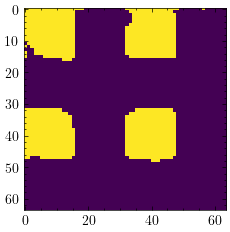

In [155]:
print(classes.size())
plt.imshow(classes.squeeze())


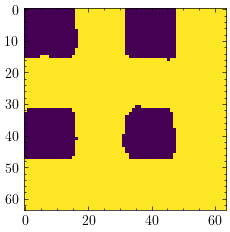

In [133]:
plt.imshow(classes.squeeze())

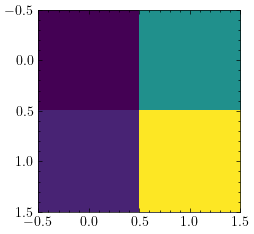

In [132]:
t = torch.tensor([[0.0, 0.5], [0.1, 1.0]])
plt.imshow(t)

In [77]:
classes

tensor([[[[1, 1, 1,  ..., 0, 0, 0],
          [1, 1, 1,  ..., 0, 0, 0],
          [1, 1, 1,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]]]])